In [1]:
#t-test 
# 독립표본 두 집단간의 평균차이를 검정( ex) 1반과 2반의 중간고사 영어 성적 평균 사이의 차이)
# 대응표본 동일한 모집단으로부터 추출된 두 변수의 평균값을 비교 분석 
# ex) 1반의 중간고사 영어 성적 평균과 기말고사 영어 평균 사이의 차이

In [5]:
import pandas as pd
import seaborn as sns

import scipy as sp
from scipy import stats # statistics

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [8]:
# satisf_al : 전반적인 만족도 (매우 불만족, 불만족, 보통, 만족, 매우 만족)

male = df[df['gender']==1].satisf_al.values # gender가 1인 행들의 satisf_al 열의 값들
female = df[df['gender']==2].satisf_al.values

In [9]:
male

array([2, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 4, 3,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 5, 4, 3, 3, 3,
       3, 4, 4, 5, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3,
       4, 4, 5, 1, 4, 4, 3, 4, 4, 3, 4, 3, 1, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 1, 1, 3])

In [10]:
female

array([3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 3, 5, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 5, 1, 3, 4,
       3, 5, 3, 4, 4, 1, 4, 3, 5, 1, 4, 1, 5, 4, 3, 3, 3, 3, 4, 4, 4, 3,
       3, 3, 3, 4, 3, 3, 5, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4,
       3, 4, 3, 2, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 1,
       3, 3, 4, 4, 3])

In [11]:
# T-test for independent samples

stats.ttest_ind(male, female) # T-test for the means of two independent samples

# 서로 다른 성별 간에 전반적인 만족도의 평균값 사이에 유의미한 차이가 "없다"

Ttest_indResult(statistic=-0.494589803056421, pvalue=0.6213329051985961)

<AxesSubplot:title={'center':'satisf_al'}, xlabel='gender'>

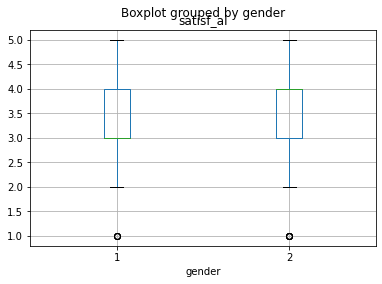

In [13]:
df.boxplot(column="satisf_al",by='gender')

In [15]:
df[['satisf_b', 'satisf_i']].describe()
# satisf_b : 구매 가격에 대한 만족도 (5점 척도)
# satisf_i : 구매 문의에 대한 만족도 (5점 척도)

,satisf_b,satisf_i
count,247.000000,247.000000
mean,2.890688,3.404858
std,0.780995,0.830110
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


In [17]:
# T-test for two related samples(동일 대상에 대한 2가지 변수값)

stats.ttest_rel(df["satisf_b"], df["satisf_i"])
# 귀무가설 : 247명의 고객이  평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 없다.
# 대립가설 : 247명의 고객이 평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 있다.

# 동일한 고객 집단이 평가한 구매 가격에 대한 만족도와 구매 문의에 대한 만족도의 평균값 사이에 유의미한 차이가 있다.

Ttest_relResult(statistic=-7.155916401026872, pvalue=9.518854506666398e-12)